<a href="https://colab.research.google.com/github/Hitomiblood/ProjectsDataScienceMaster/blob/main/Proyecto_TFM/TestingModelos/Models/ExtraccionROIModelsBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creando procesamiento de Frames para extracción de secciones de espermatozoides móviles. (Base)

In [1]:
%%capture
!pip install ultralytics

In [2]:
%%capture
!wget https://www.dropbox.com/scl/fi/g1ozmpe6y9k48cxc041rp/bestSmall100.pt?rlkey=fs2aktr3tdkay39lg3gw9x9tb&st=iynm04em&dl=0
!mv bestSmall100.pt?rlkey=fs2aktr3tdkay39lg3gw9x9tb bestSmall100.pt

In [3]:
%%capture
!wget https://www.dropbox.com/scl/fi/wgyl8ibb6rgo04ezuhzd5/Suppl_1.zip?rlkey=rmme7la6j6593wuacwiap8j46&st=hw2c1s43&dl=0
!mv Suppl_1.zip?rlkey=rmme7la6j6593wuacwiap8j46 Suppl_1.zip
!unzip Suppl_1.zip

--2024-05-12 11:02:09--  https://www.dropbox.com/scl/fi/wgyl8ibb6rgo04ezuhzd5/Suppl_1.zip?rlkey=rmme7la6j6593wuacwiap8j46
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1bbc51e09c5fafd1318a23de60.dl.dropboxusercontent.com/cd/0/inline/CSxVUAR5WiLh-ibNrHv6grVtXwK-chRVCmdsFiNHaOKDBLVtlFmGVT_Dw9a8bYIsWQYgBhKLFmWs3Jz_Rp5KY-OuD5AskI9sKEjWAyrQV0PzsvTs6YJVkv0KJbmmdqjCr2ZefJjgYuAqTY7hNFq7gX8I/file# [following]
--2024-05-12 11:02:10--  https://uc1bbc51e09c5fafd1318a23de60.dl.dropboxusercontent.com/cd/0/inline/CSxVUAR5WiLh-ibNrHv6grVtXwK-chRVCmdsFiNHaOKDBLVtlFmGVT_Dw9a8bYIsWQYgBhKLFmWs3Jz_Rp5KY-OuD5AskI9sKEjWAyrQV0PzsvTs6YJVkv0KJbmmdqjCr2ZefJjgYuAqTY7hNFq7gX8I/file
Resolving uc1bbc51e09c5fafd1318a23de60.dl.dropboxusercontent.com (uc1bbc51e09c5fafd1318a23de60.dl.dropboxusercontent.com)... 162.125.13.15, 262

In [4]:
from ultralytics import YOLO
# Load a pretrained YOLO model (recommended for training)
model = YOLO('bestSmall100.pt')

In [5]:
import cv2

def extraer_primer_frame(video_path):
    # Cargar el video
    cap = cv2.VideoCapture(video_path)

    # Verificar si el video se ha abierto correctamente
    if not cap.isOpened():
        print("Error al abrir el video")
        return None

    # Leer el primer frame
    ret, frame = cap.read()

    # Verificar si el frame se ha leído correctamente
    if not ret:
        print("Error al leer el frame")
        return None

    # Liberar el objeto VideoCapture
    cap.release()

    print("Primer frame extraído exitosamente")

    return frame


In [6]:
# Ruta del video
video_path = "Suppl_1.avi"

# Extraer el primer frame y almacenarlo en una variable
primer_frame = extraer_primer_frame(video_path)

# Verificar si el primer frame se ha almacenado correctamente
if primer_frame is not None:
    # Aquí puedes trabajar con el primer frame almacenado en la variable primer_frame
    print("Dimensiones del primer frame:", primer_frame.shape)
else:
    print("No se pudo extraer el primer frame")

Primer frame extraído exitosamente
Dimensiones del primer frame: (1200, 1920, 3)


In [8]:
results = model(primer_frame)


0: 768x1216 32 Movils, 1941.3ms
Speed: 18.6ms preprocess, 1941.3ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 1216)


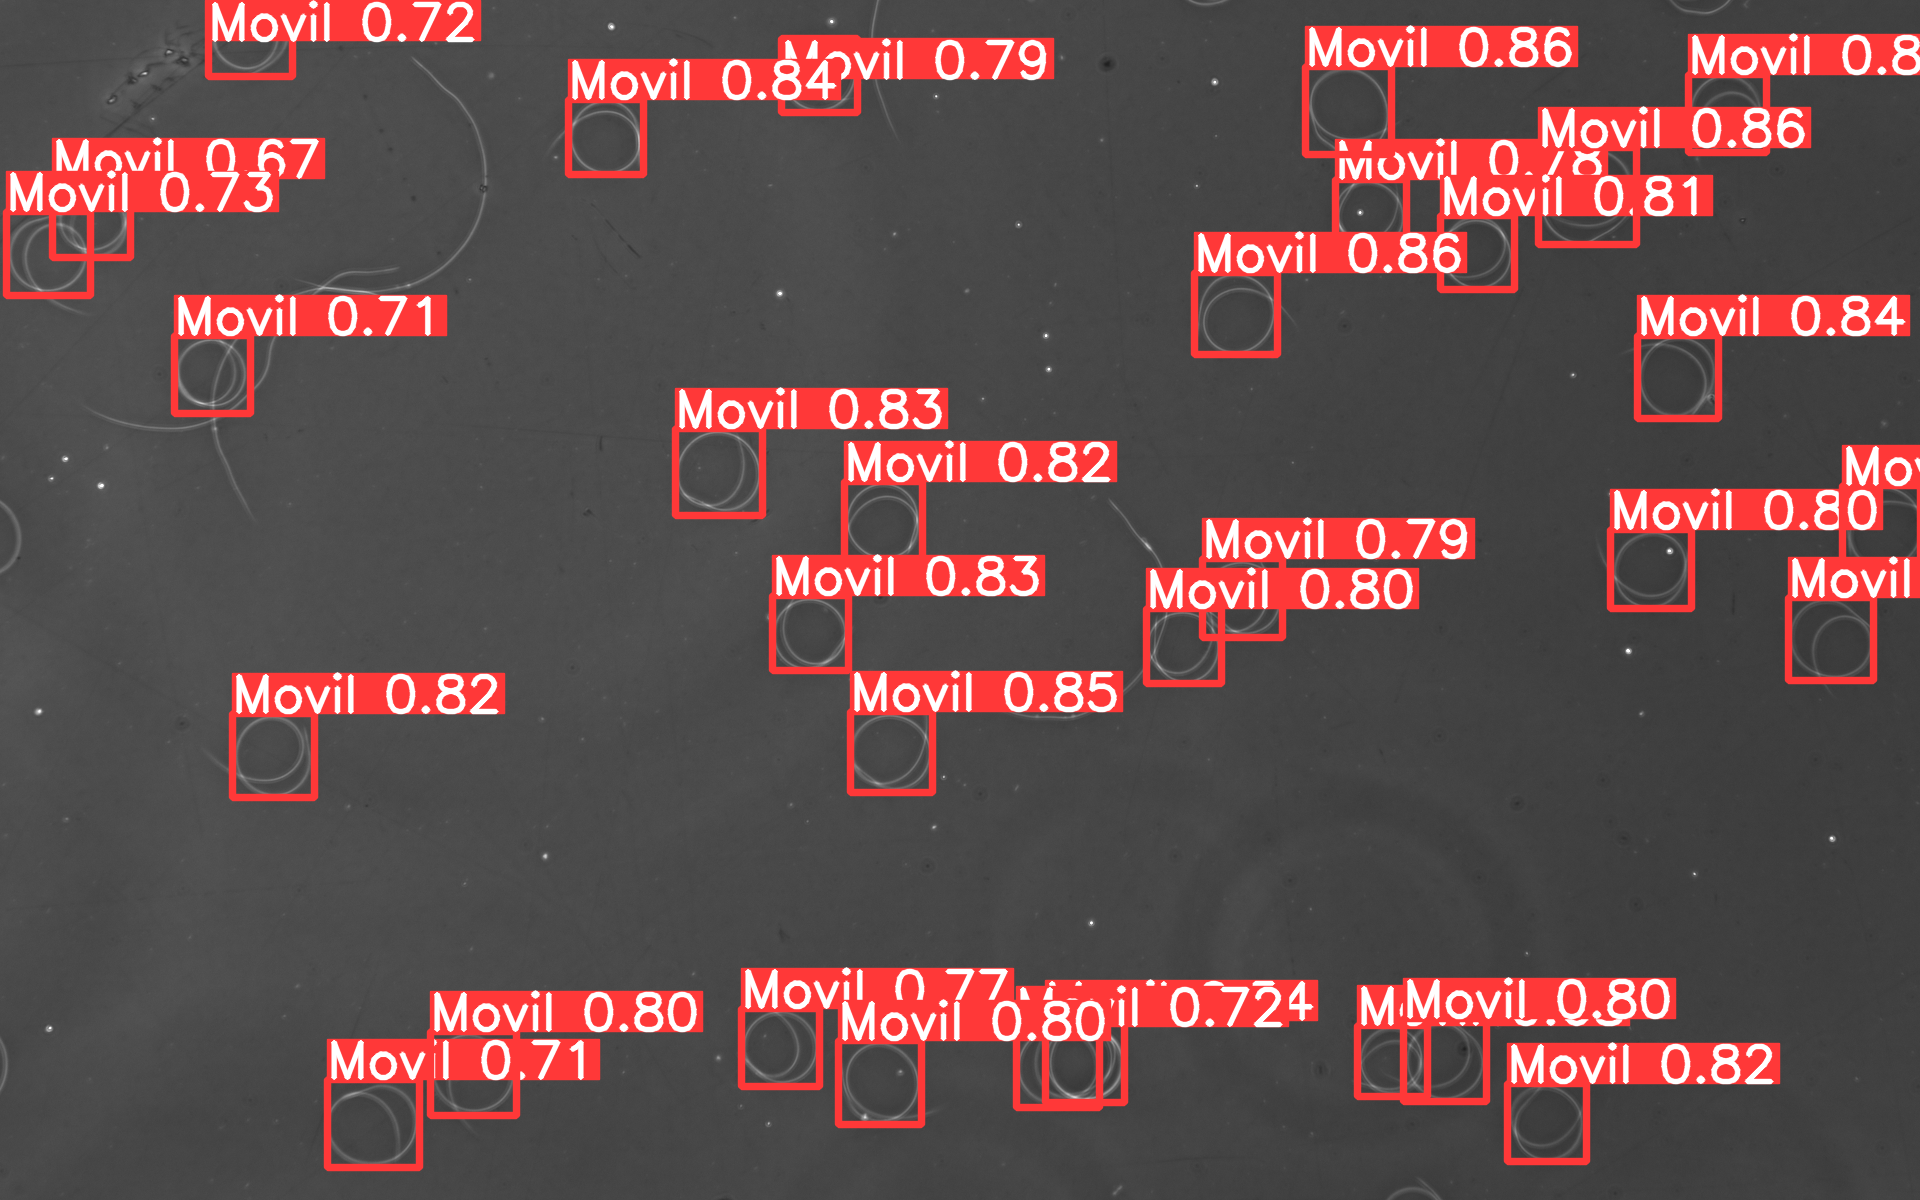

In [22]:
from google.colab.patches import cv2_imshow
anotated = results[0].plot()
cv2_imshow(anotated)

In [24]:
# Obtener las cajas y los IDs de seguimiento
boxes = results[0].boxes.xyxyn.cpu()

In [37]:
import os

def recortar_y_guardar_imagenes(orig_img, boxes, output_folder):
    # Crear la carpeta de salida si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Aumentar el tamaño de las imágenes recolectadas en 2 píxeles por lado
    margin = 30

    # Dimensiones de la imagen original
    img_height, img_width = orig_img.shape[:2]

    # Iterar sobre las cajas
    for i, box in enumerate(boxes):
        # Desnormalizar las coordenadas de la caja
        left, top, right, bottom = box
        left = int(left * img_width)
        top = int(top * img_height)
        right = int(right * img_width)
        bottom = int(bottom * img_height)

        # Recortar la región de interés (ROI) de la imagen original
        roi = orig_img[max(top - margin, 0):min(bottom + margin, img_height),
                       max(left - margin, 0):min(right + margin, img_width)]

        # Guardar la región de interés como una imagen separada
        cv2.imwrite(os.path.join(output_folder, f"objeto_{i}.jpg"), roi)

In [38]:
# Carpeta donde se guardarán las imágenes recortadas
carpeta_salida = "objetos_detectados"

# Recortar y guardar las imágenes
recortar_y_guardar_imagenes(primer_frame, boxes, carpeta_salida)

In [39]:
import shutil
archivo = shutil.make_archive('objetos_detectados', 'zip','/content/objetos_detectados')